# Tirone Levels

https://www.metastock.com/customer/resources/taaz/?p=110

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500


In [4]:
df['Adj Close'][-1]

157.06637599999999

In [5]:
print('Lowest Price:', df['Adj Close'].min())
print('Highest Price:', df['Adj Close'].max())
print('Mean Price:', df['Adj Close'].mean())
print('Lowest Low:', df['Low'].min())
print('Highest High:', df['High'].max())

Lowest Price: 146.202972
Highest Price: 230.275482
Mean Price: 201.84617995238094
Lowest Low: 146.589996
Highest High: 233.470001


## Midpoint Method

In [6]:
Top_Line = abs(((df['High'].max() - df['Low'].min())/3) - df['High'].max())
Center_Line = ((df['High'].max() - df['Low'].min())/2) + df['Low'].min()
Bottom_Line = ((df['High'].max() - df['Low'].min())/3) + df['Low'].min()

## Mean Method

In [7]:
Adjusted_Mean = abs((df['High'].max() + df['Low'].min() + df['Adj Close'][-1])/3)
#Adjusted_Mean = (df['High'].max() + df['Low'].min() + df['Adj Close'].mean())/3
Extreme_High = abs((df['High'].max()  - df['Low'].min()) + Adjusted_Mean)
Regular_High = abs((Adjusted_Mean*2) - df['Low'].min())
Regular_Low = abs((Adjusted_Mean*2) - df['High'].max())
Extreme_Low = abs((df['High'].max() - df['Low'].min()) - Adjusted_Mean)

## Line Chart

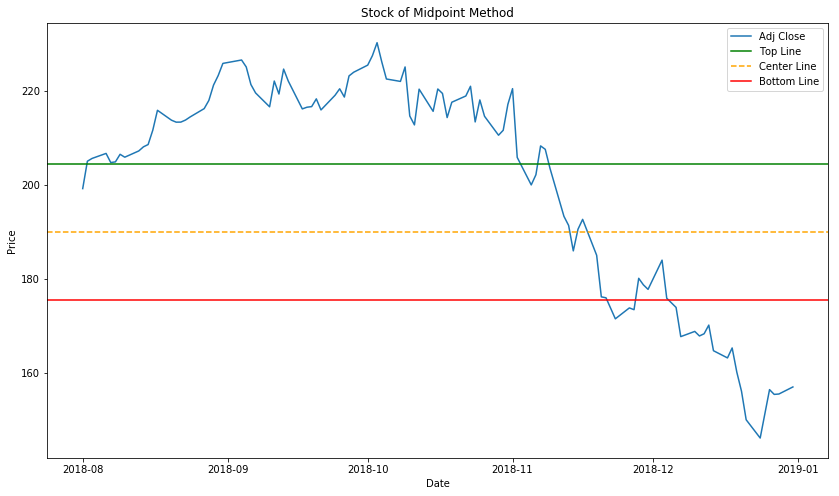

In [8]:
# Line Chart
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.axhline(Top_Line, color='green', label='Top Line')
plt.axhline(Center_Line, color='orange', linestyle='--',label='Center Line')
plt.axhline(Bottom_Line, color='red', label='Bottom Line')
plt.legend(loc='best')
plt.title('Stock of Midpoint Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

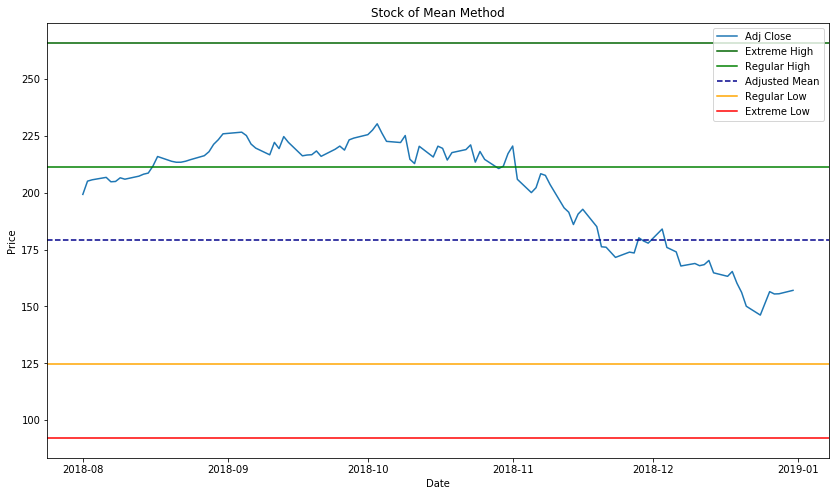

In [9]:
# Line Chart
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.axhline(Extreme_High, color='darkgreen', label='Extreme High')
plt.axhline(Regular_High, color='green', label='Regular High')
plt.axhline(Adjusted_Mean, color='darkblue', linestyle='--',label='Adjusted Mean')
plt.axhline(Regular_Low, color='orange', label='Regular Low')
plt.axhline(Extreme_Low, color='red', label='Extreme Low')
plt.legend(loc='best')
plt.title('Stock of Mean Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick

In [11]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,False


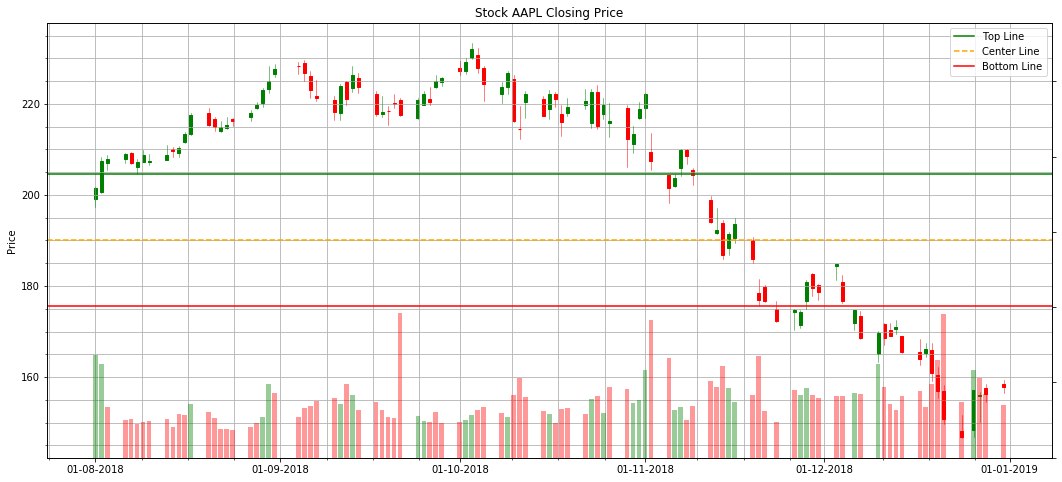

In [12]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.axhline(Top_Line, color='green', label='Top Line')
ax1.axhline(Center_Line, color='orange', linestyle='--',label='Center Line')
ax1.axhline(Bottom_Line, color='red', label='Bottom Line')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Midpoint Method)')
ax1.set_ylabel('Price')
ax1.legend()

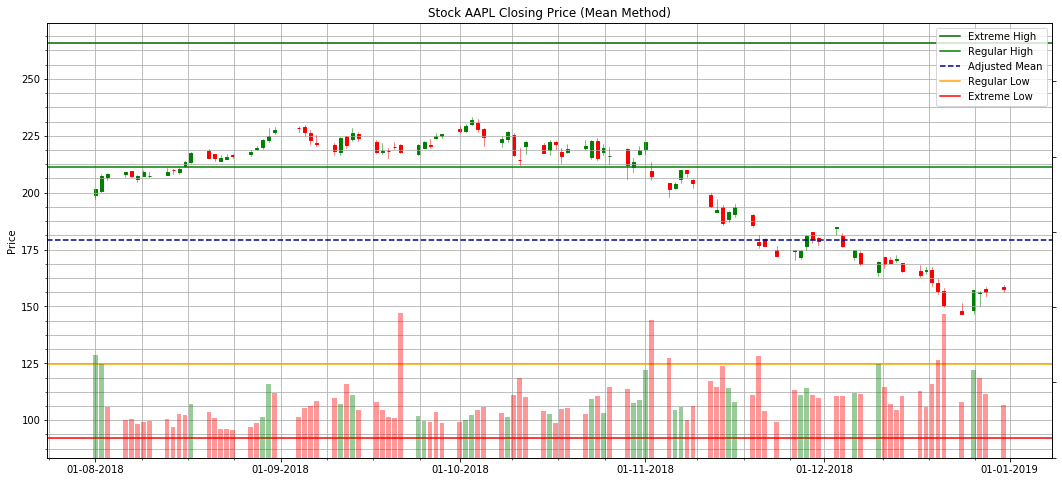

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.axhline(Extreme_High, color='darkgreen', label='Extreme High')
ax1.axhline(Regular_High, color='green', label='Regular High')
ax1.axhline(Adjusted_Mean, color='darkblue', linestyle='--',label='Adjusted Mean')
ax1.axhline(Regular_Low, color='orange', label='Regular Low')
ax1.axhline(Extreme_Low, color='red', label='Extreme Low')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Mean Method)')
ax1.set_ylabel('Price')
ax1.legend()